# Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
from sklearn.tree import plot_tree

from pandas_profiling import ProfileReport

import warnings
# Suppress warnings
warnings.filterwarnings("ignore")

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.feature_selection import RFE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, roc_curve, auc

C:\Users\piyus\AppData\Local\Temp\ipykernel_27756\2060513506.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
data = pd.read_excel("Data_Cortex_Nuclear.xls")

# EDA

In [3]:
data

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0         309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1         309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2         309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3         309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4         309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
5         309_6  0.447506  0.628176  0.367388  2.385939  4.807635  0.218578   
6         309_7  0.428033  0.573696  0.342709  2.334224  4.473130  0.225173   
7         309_8  0.416923  0.564036  0.327703  2.260135  4.268735  0.214834   
8         309_9  0.386311  0.538428  0.317720  2.125725  4.063950  0.207222   
9        309_10  0.380827  0.499294  0.362462  2.096266  3.598587  0.227649   
10       309_11  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475   
11       309_12  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333   
12       309_13  0.364873  0.482102  0.312539  1.946201  3.349592  0.230898   
13       309_14  0.381911  0.485914  0.310951  1.958907  3.349290  0.225800   
14       309_15  0.374410  0.462313  0.344629  1.861162  3.287123  0.221811   
15        311_1  0.743118  0.862653  0.377742  2.735757  6.067570  0.219049   
16        311_2  0.711480  0.807054  0.351591  2.546888  5.595574  0.199170   
17        311_3  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323   
18        311_4  0.677359  0.770235  0.356397  2.563223  4.975196  0.228087   
19        311_5  0.591572  0.678768  0.312480  2.164182  4.313938  0.195786   
20        311_6  0.618517  0.716672  0.319701  2.285938  4.571180  0.206927   
21        311_7  0.702608  0.699581  0.387750  2.437587  4.449231  0.258500   
22        311_8  0.598869  0.690271  0.349774  2.308371  4.229412  0.221493   
23        311_9  0.561867  0.641892  0.308488  2.157728  4.020693  0.216427   
24       311_10  0.550970  0.561356  0.320853  2.197868  3.558896  0.237770   
25       311_11  0.538413  0.701865  0.384445  2.482137  4.109706  0.288018   
26       311_12  0.521127  0.583045  0.304279  2.053415  3.381345  0.251661   
27       311_13  0.488372  0.540086  0.291310  1.913403  2.873623  0.215422   
28       311_14  0.514855  0.564791  0.316056  1.957016  2.978824  0.250632   
29       311_15  0.485100  0.556375  0.287250  1.892166  2.847005  0.223041   
30        320_1  0.627582  0.954187  0.446958  2.930717  5.915039  0.197897   
31        320_2  0.651253  0.962021  0.464964  2.992689  5.975028  0.202810   
32        320_3  0.644346  0.967179  0.470056  3.073847  5.927379  0.205131   
33        320_4  0.568229  0.812018  0.393465  2.606780  5.808102  0.218211   
34        320_5  0.587038  0.863728  0.411203  2.757975  6.006657  0.223688   
35        320_6  0.595904  0.861763  0.421204  2.831169  6.368257  0.233017   
36        320_7  0.522918  0.721090  0.363541  2.456261  5.191732  0.229179   
37        320_8  0.530855  0.748072  0.385529  2.573126  5.495063  0.237427   
38        320_9  0.534999  0.773863  0.391588  2.667701  5.987583  0.246624   
39       320_10  0.519443  0.736371  0.370568  2.503050  4.947198  0.266489   
40       320_11  0.508590  0.735699  0.384369  2.545403  5.101001  0.257127   
41       320_12  0.516538  0.737479  0.383670  2.624646  5.601210  0.259119   
42       320_13  0.454421  0.685278  0.360301  2.392890  4.500000  0.278715   
43       320_14  0.471746  0.697323  0.371540  2.472661  4.652025  0.278197   
44       320_15  0.481273  0.684116  0.360785  2.538809  5.008123  0.287229   
45        321_1  0.560614  0.763028  0.402962  2.933516  6.317279  0.192320   
46        321_2  0.516108  0.749622  0.401297  2.919243  6.306811  0.192541   
47        321_3  0.507321  0.770026  0.417959  2.925818  6.766150  0.201012   
48        321_4  0.505093  0.695549  0.376029  2.915585  5.917957  0.226734   
49        321_5  0.479120  0.689170  0.381125  2.913558  6

In [4]:
data.shape

(1080, 82)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [6]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

**Duplicate Values**

In [7]:
# Looking for duplicate values

data.duplicated(subset = 'MouseID').sum()

0

In [8]:
data.drop(['MouseID', 'Genotype', 'Treatment', 'Behavior'], axis = 1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

In [10]:
data.shape

(1080, 78)

In [11]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

**Data Profile using Pandas Profiling**

In [12]:
# # Randomly select 5 column names from the DataFrame
# selected_columns = random.sample(data.columns.tolist(), 5)

# # Create a new DataFrame with the selected columns
# data_subset = data[selected_columns]

# # Generate a Pandas Profiling report
# profile = ProfileReport(data_subset)

# # Save the report to an HTML file (optional)
# profile.to_file("data_profile_report.html")

# # Display the report (optional)
# profile.to_widgets()

In [13]:
# # Create a profile report for the selected columns
# profile = ProfileReport(data)

# # Generate the report and save it as an HTML file
# profile.to_file("sample_data_profile_report.html")

**Null Values**

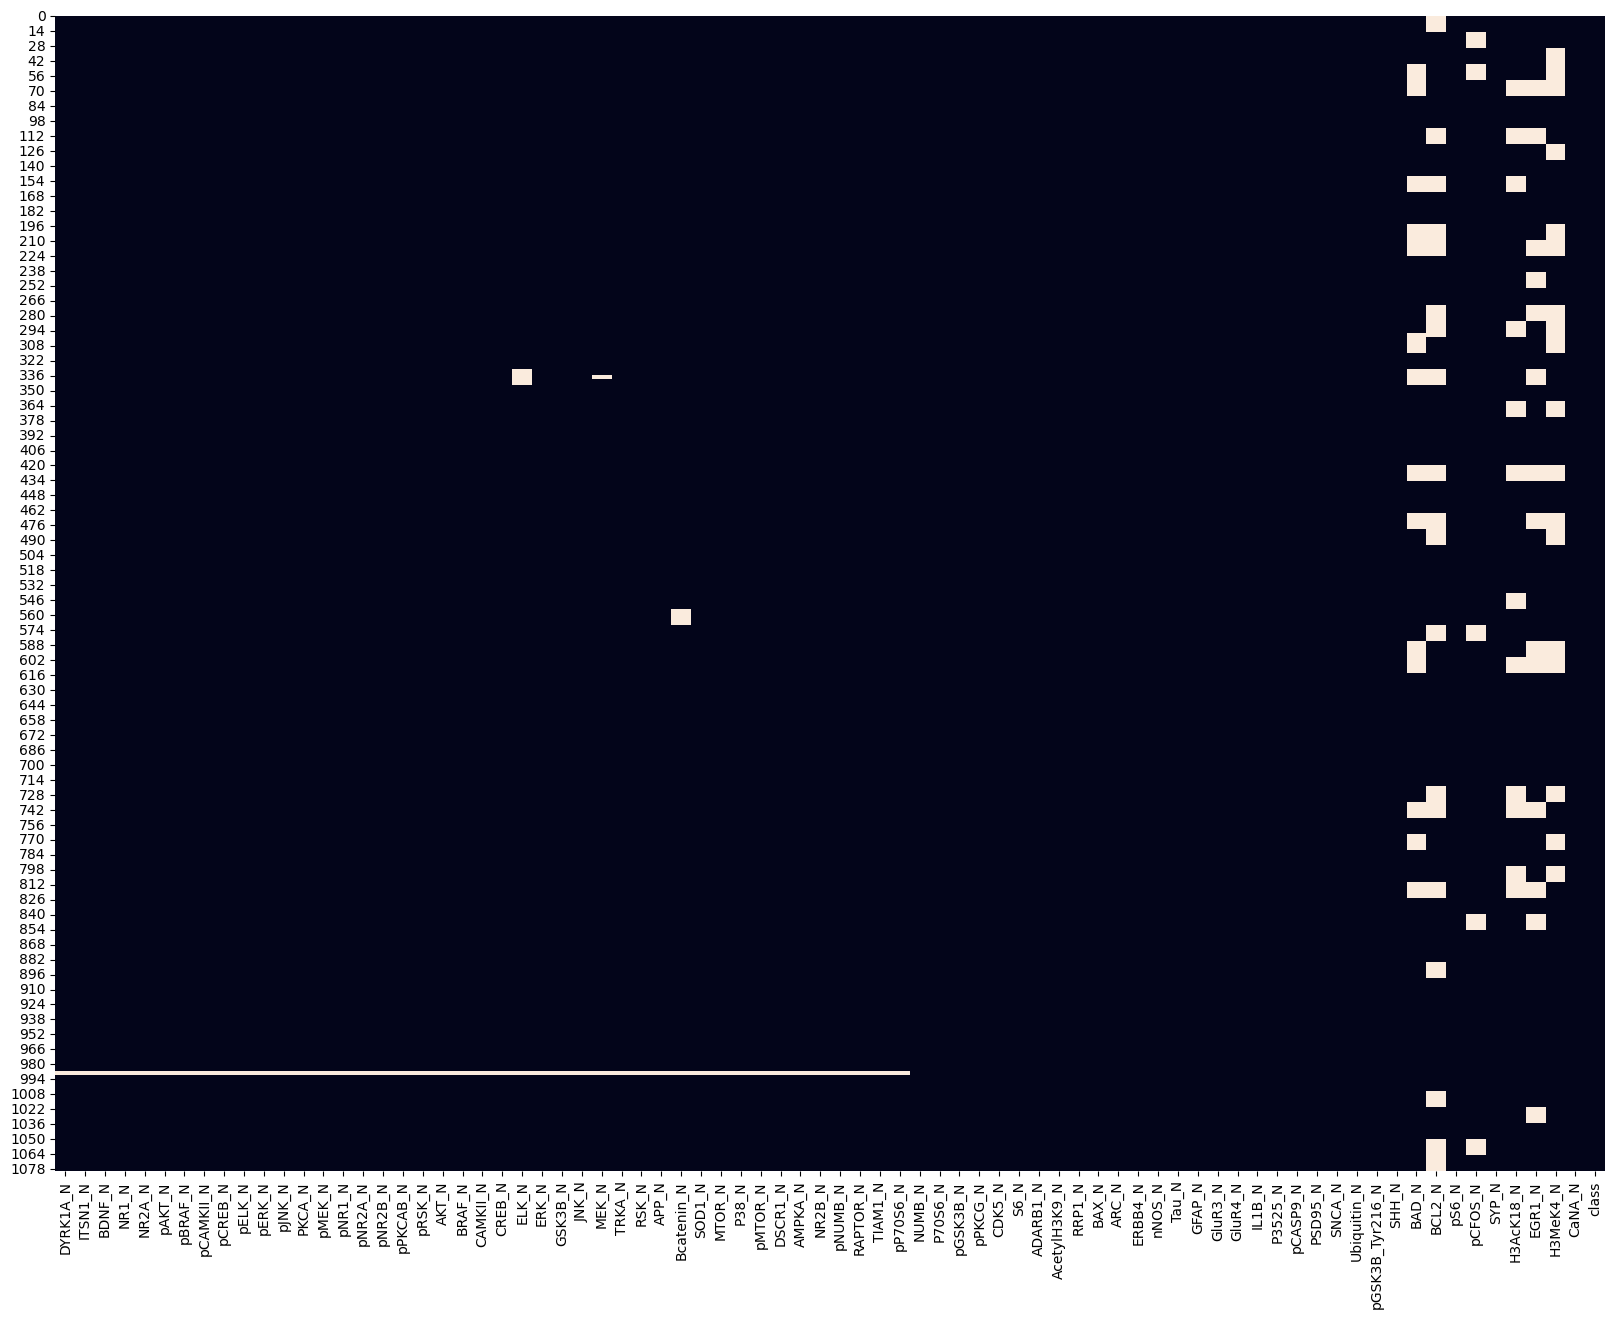

In [14]:
plt.figure(figsize = (20, 15))
sns.heatmap(data.isnull(), cbar = False)
plt.show()

In [15]:
null_percentage = pd.DataFrame( round(data.isnull().sum()*100/data.shape[0], 2)).reset_index() 
null_percentage.columns = ["Column Names", "Null Values Percentage"]

null_values = pd.DataFrame(data.isnull().sum()).reset_index()
null_values.columns = ["Column Names", "Null Values"]

null_data = pd.merge(null_values, null_percentage, on = "Column Names")
null_data.sort_values("Null Values", ascending = False)

Column Names  Null Values  Null Values Percentage
69           BCL2_N          285                   26.39
75         H3MeK4_N          270                   25.00
68            BAD_N          213                   19.72
74           EGR1_N          210                   19.44
73        H3AcK18_N          180                   16.67
71          pCFOS_N           75                    6.94
23            ELK_N           18                    1.67
31       Bcatenin_N           18                    1.67
27            MEK_N            7                    0.65
34            P38_N            3                    0.28
28           TRKA_N            3                    0.28
29            RSK_N            3                    0.28
30            APP_N            3                    0.28
32           SOD1_N            3                    0.28
33           MTOR_N            3                    0.28
0          DYRK1A_N            3                    0.28
35          pMTOR_N            3                    0.28
36          DSCR1_N            3                    0.28
37          AMPKA_N            3                    0.28
26            JNK_N            3                    0.28
1           ITSN1_N            3                    0.28
40         RAPTOR_N            3                    0.28
41          TIAM1_N            3                    0.28
42         pP70S6_N            3                    0.28
38           NR2B_N            3                    0.28
39          pNUMB_N            3                    0.28
25          GSK3B_N            3                    0.28
12           PKCA_N            3                    0.28
24            ERK_N            3                    0.28
7         pCAMKII_N            3                    0.28
6           pBRAF_N            3                    0.28
5            pAKT_N            3                    0.28
4            NR2A_N            3                    0.28
3             NR1_N            3                    0.28
2            BDNF_N            3                    0.28
8           pCREB_N            3                    0.28
9            pELK_N            3                    0.28
11           pJNK_N            3                    0.28
10           pERK_N            3                    0.28
13           pMEK_N            3                    0.28
14           pNR1_N            3                    0.28
15          pNR2A_N            3                    0.28
16          pNR2B_N            3                    0.28
17         pPKCAB_N            3                    0.28
18           pRSK_N            3                    0.28
19            AKT_N            3                    0.28
20           BRAF_N            3                    0.28
21         CAMKII_N            3                    0.28
22           CREB_N            3                    0.28
66  pGSK3B_Tyr216_N            0                    0.00
62         pCASP9_N            0                    0.00
63          PSD95_N            0                    0.00
64           SNCA_N            0                    0.00
65      Ubiquitin_N            0                    0.00
76           CaNA_N            0                    0.00
67            SHH_N            0                    0.00
70            pS6_N            0                    0.00
72            SYP_N            0                    0.00
60           IL1B_N            0                    0.00
61          P3525_N            0                    0.00
52            BAX_N            0                    0.00
59          GluR4_N            0                    0.00
49         ADARB1_N            0                    0.00
43           NUMB_N            0                    0.00
44          P70S6_N            0                    0.00
45         pGSK3B_N            0                    0.00
46          pPKCG_N            0                    0.00
47           CDK5_N            0                    0.00
48             S6_N            0                    0.00
50     AcetylH3K9

No need to drop any columns as missing values percentages are not very high 

<Axes: >

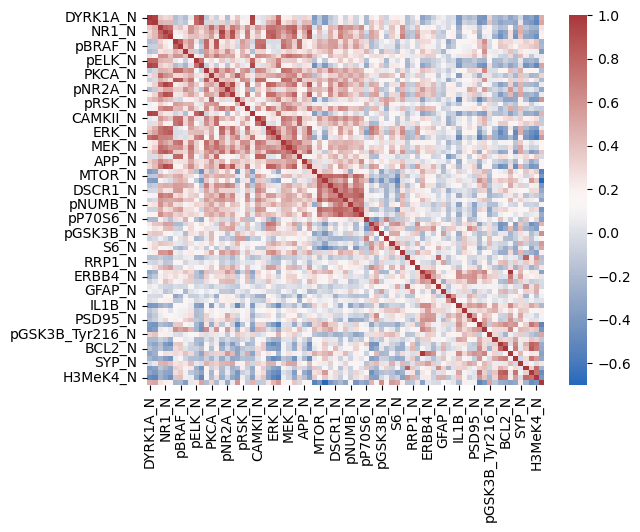

In [16]:
corr = data.corr()
sns.heatmap(corr, annot=False, annot_kws={'size':109000}, cmap='vlag')

Let's see if any variables are perfectly correlated

In [17]:
s = (corr == 1).astype(int).sum(axis = 1) > 1
print(f"The variables that are perfectly collinear are: {s.index[s][0]} and {s.index[s][1]}")

The variables that are perfectly collinear are: ARC_N and pS6_N


In [18]:
print(data[["ARC_N", "pS6_N"]])

         ARC_N     pS6_N
0     0.106305  0.106305
1     0.106592  0.106592
2     0.108303  0.108303
3     0.103184  0.103184
4     0.104784  0.104784
5     0.106476  0.106476
6     0.097834  0.097834
7     0.099494  0.099494
8     0.105145  0.105145
9     0.093300  0.093300
10    0.094357  0.094357
11    0.098415  0.098415
12    0.097652  0.097652
13    0.094642  0.094642
14    0.099140  0.099140
15    0.138655  0.138655
16    0.111362  0.111362
17    0.112036  0.112036
18    0.111507  0.111507
19    0.100578  0.100578
20    0.110682  0.110682
21    0.104897  0.104897
22    0.112352  0.112352
23    0.103605  0.103605
24    0.104263  0.104263
25    0.097980  0.097980
26    0.110079  0.110079
27    0.075445  0.075445
28    0.091461  0.091461
29    0.093172  0.093172
30    0.148773  0.148773
31    0.147660  0.147660
32    0.143169  0.143169
33    0.140063  0.140063
34    0.140775  0.140775
35    0.138192  0.138192
36    0.132069  0.132069
37    0.133310  0.133310
38    0.127625  0.127625


Both the columns looks very same. Let's see if they're exactly same numerically

In [19]:
print(f"No. of values that aren't numerically equal: {sum(data['ARC_N'] != data['pS6_N'])}")

No. of values that aren't numerically equal: 0


We can consider dropping one of these columns as they are the very same columns

In [20]:
data = data.drop("pS6_N", axis =1)
data.shape

(1080, 77)

**Train-Test Split**

In [21]:
X = data.drop('class', axis = 1)
Y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 69)

In [22]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of Y_train: {y_train.shape}")
print(f"Shape of Y_test: {y_test.shape}")

Shape of X_train: (864, 76)
Shape of X_test: (216, 76)
Shape of Y_train: (864,)
Shape of Y_test: (216,)


In [23]:
y_train.head(11)

201    c-SC-m
917    t-CS-s
925    t-CS-s
266    c-SC-m
160    c-SC-m
7      c-CS-m
184    c-SC-m
100    c-CS-m
869    t-CS-s
878    t-CS-s
771    t-SC-m
Name: class, dtype: object

Label Encoding Y

In [24]:
y_lab_encoder = LabelEncoder()
y_train_encoded = y_lab_encoder.fit_transform(y_train)
y_train_encoded

array([2, 5, 5, 2, 2, 0, 2, 0, 5, 5, 6, 2, 6, 3, 3, 6, 7, 0, 0, 7, 6, 7,
       1, 5, 0, 1, 3, 0, 5, 5, 5, 3, 4, 2, 2, 6, 6, 7, 5, 3, 5, 6, 1, 7,
       1, 0, 7, 2, 6, 5, 6, 7, 4, 2, 6, 4, 1, 0, 3, 5, 6, 2, 7, 3, 0, 0,
       7, 1, 6, 0, 2, 0, 6, 7, 7, 2, 1, 7, 1, 6, 1, 5, 7, 7, 5, 1, 5, 3,
       7, 4, 1, 1, 1, 4, 3, 3, 7, 0, 7, 1, 4, 5, 2, 2, 3, 2, 2, 6, 7, 6,
       1, 7, 3, 2, 0, 1, 4, 5, 7, 0, 3, 6, 2, 3, 3, 7, 1, 3, 1, 1, 5, 3,
       6, 7, 2, 4, 2, 4, 7, 2, 7, 7, 7, 2, 0, 5, 5, 0, 4, 4, 0, 3, 7, 3,
       4, 0, 5, 4, 1, 6, 3, 3, 2, 2, 4, 5, 3, 0, 7, 3, 0, 4, 7, 2, 7, 1,
       7, 6, 3, 3, 6, 0, 1, 3, 0, 6, 0, 2, 5, 0, 1, 0, 7, 7, 5, 7, 2, 1,
       3, 6, 6, 0, 7, 3, 7, 4, 0, 1, 3, 5, 1, 2, 3, 1, 2, 4, 2, 4, 4, 2,
       5, 0, 2, 3, 2, 3, 5, 4, 3, 4, 0, 7, 4, 2, 0, 1, 1, 0, 2, 0, 1, 0,
       1, 2, 5, 5, 6, 4, 2, 2, 1, 6, 7, 5, 7, 4, 4, 4, 3, 5, 4, 1, 6, 1,
       7, 6, 4, 7, 3, 7, 6, 2, 1, 2, 1, 1, 3, 1, 1, 4, 6, 1, 6, 4, 5, 7,
       6, 7, 1, 1, 2, 5, 3, 3, 5, 4, 3, 0, 1, 6, 6,

**Treatment of Missing Values**

In [25]:
columns_with_null_val = list( null_data.loc[null_data['Null Values Percentage']>0].iloc[:, 0] )

Before and After KNN Imputation Histogram

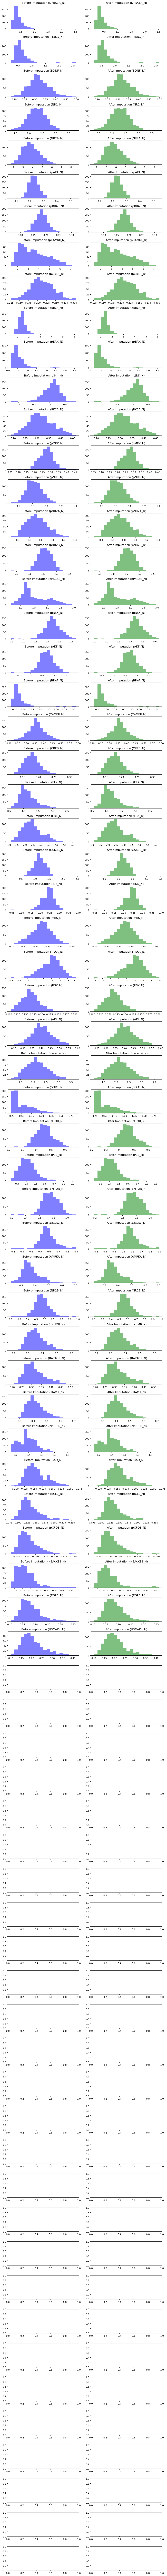

In [26]:
# Create a copy of the DataFrame to store the imputed data
X_train_imputed = X_train.copy()

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform imputation on the entire dataset
X_train_imputed = knn_imputer.fit_transform(X_train)

# Convert the result back to a DataFrame (if needed)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

# Create a figure for side-by-side comparisons
num_columns = X_train.shape[1]
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2*num_columns))

for i, col in enumerate(columns_with_null_val):
    # Calculate the current row position
    row_position = i

    # Plot before distribution for each column
    axes[row_position, 0].hist(X_train[col].dropna(), bins=20, color='blue', alpha=0.5)
    axes[row_position, 0].set_title(f'Before Imputation ({col})')

    # Plot after distribution for each column
    axes[row_position, 1].hist(X_train_imputed[col], bins=20, color='green', alpha=0.5)
    axes[row_position, 1].set_title(f'After Imputation ({col})')

# Set the layout and display the plot
plt.tight_layout()
plt.show()

Before and After KNN Imputation Boxplot

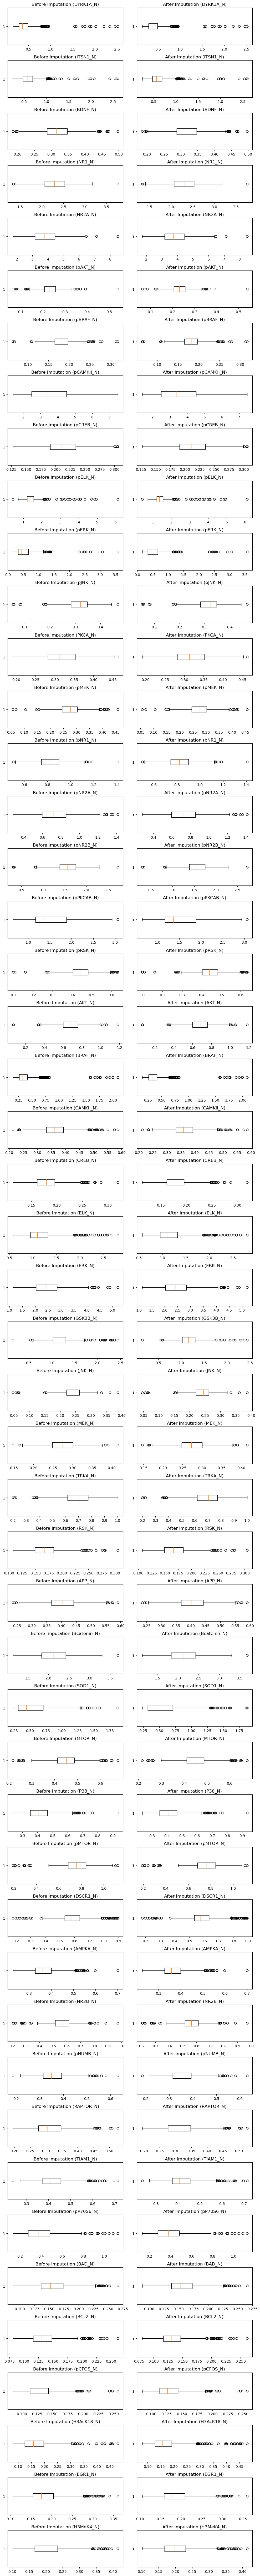

In [27]:
# Create a copy of the DataFrame to store the imputed data
X_train_imputed = X_train.copy()

# Initialize KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Determine the number of columns
num_columns = len(columns_with_null_val)

# Create a figure for side-by-side comparisons
fig, axes = plt.subplots(num_columns, 2, figsize=(10, 2*num_columns))

# Perform imputation on the entire dataset
X_train_imputed = knn_imputer.fit_transform(X_train)

# Convert the result back to a DataFrame (if needed)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

for i, col in enumerate(columns_with_null_val):
    # Calculate the current row position
    row_position = i

    # Plot before distribution for each column
    axes[row_position, 0].boxplot(X_train[col].dropna(), vert=False)
    axes[row_position, 0].set_title(f'Before Imputation ({col})')

    # Plot after distribution for each column
    axes[row_position, 1].boxplot(X_train_imputed[col], vert=False)
    axes[row_position, 1].set_title(f'After Imputation ({col})')

# Set the layout and display the plot
plt.tight_layout()
plt.show()

**Verifying if data is balanced or not**

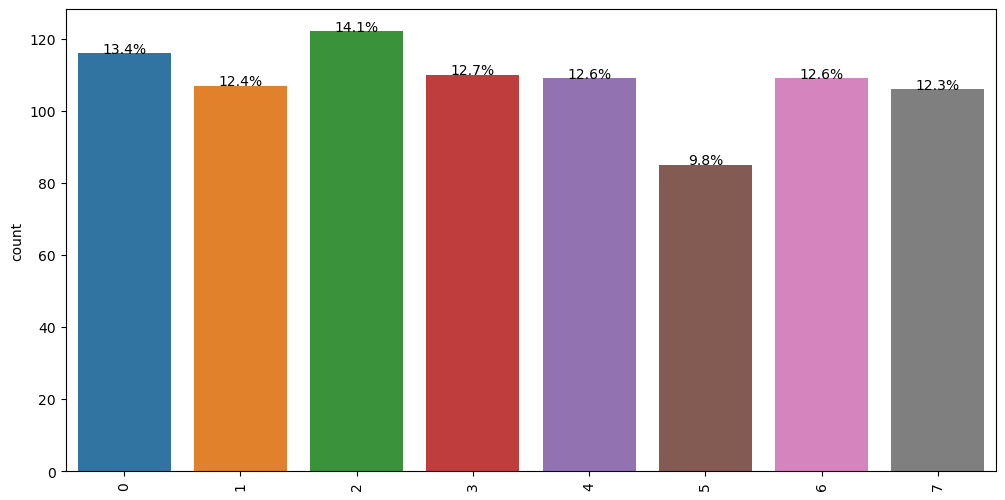

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x = y_train_encoded)
plt.xticks(rotation=90)

# Annotate the percentages on top of each bar
total = len(y_train_encoded)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

plt.show()

Data looks almost balanced. So we don't need to employ any Sampling Techniques

In [29]:
# Access the original labels for each encoded value
original_labels = y_lab_encoder.classes_

# Print the mapping of encoded values to original labels
for encoded_value, original_label in enumerate(original_labels):
    print(f"Encoded Value: {encoded_value} corresponds to Original Label: {original_label}")

Encoded Value: 0 corresponds to Original Label: c-CS-m
Encoded Value: 1 corresponds to Original Label: c-CS-s
Encoded Value: 2 corresponds to Original Label: c-SC-m
Encoded Value: 3 corresponds to Original Label: c-SC-s
Encoded Value: 4 corresponds to Original Label: t-CS-m
Encoded Value: 5 corresponds to Original Label: t-CS-s
Encoded Value: 6 corresponds to Original Label: t-SC-m
Encoded Value: 7 corresponds to Original Label: t-SC-s


**Feature Scaling**

In [30]:
feature_scaler = StandardScaler()
X_train_imputed_scaled = feature_scaler.fit_transform(X_train_imputed)
X_train_imputed_scaled = pd.DataFrame(X_train_imputed_scaled, columns = X_train_imputed.columns)
X_train_imputed_scaled.describe()

DYRK1A_N       ITSN1_N        BDNF_N         NR1_N        NR2A_N  \
count  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02   
mean  -9.663052e-17  2.117648e-16 -6.209025e-16  3.700743e-16 -6.537980e-16   
std    1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00   
min   -1.134990e+00 -1.493370e+00 -2.733689e+00 -2.828820e+00 -2.304153e+00   
25%   -5.586949e-01 -5.716099e-01 -6.408686e-01 -6.739015e-01 -7.439595e-01   
50%   -2.437333e-01 -2.067061e-01 -6.736105e-02 -6.654580e-03 -1.054225e-01   
75%    2.548353e-01  2.960820e-01  5.840015e-01  6.730962e-01  6.579429e-01   
max    8.493526e+00  8.013009e+00  3.663247e+00  4.269792e+00  5.065591e+00   

             pAKT_N       pBRAF_N     pCAMKII_N       pCREB_N        pELK_N  \
count  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02   
mean  -1.233581e-16 -2.014849e-16 -1.973730e-16 -1.315820e-16  4.358653e-16   
std    1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00   
min   -4.101648e+00 -4.340213e+00 -1.657396e+00 -2.642607e+00 -2.126953e+00   
25%   -6.444701e-01 -6.165537e-01 -8.216926e-01 -6.721534e-01 -4.657895e-01   
50%   -4.384628e-02  7.565518e-03 -1.605555e-01 -5.736572e-02 -1.677485e-01   
75%    5.819751e-01  5.619707e-01  7.227476e-01  6.831914e-01  2.733866e-01   
max    7.397510e+00  4.982009e+00  2.982873e+00  2.898429e+00  9.954577e+00   

       ...  pGSK3B_Tyr216_N         SHH_N         BAD_N        BCL2_N  \
count  ...     8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02   
mean   ...    -1.551228e-15  6.373503e-16 -2.549401e-16 -4.744147e-16   
std    ...     1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00   
min    ...    -2.872692e+00 -2.430764e+00 -2.468159e+00 -2.102501e+00   
25%    ...    -5.838110e-01 -6.941143e-01 -7.305564e-01 -6.951531e-01   
50%    ...     1.822386e-02 -8.296442e-02 -1.862069e-01 -1.868584e-01   
75%    ...     7.115371e-01  4.925124e-01  5.110180e-01  4.521634e-01   
max    ...     3.841867e+00  4.390831e+00  3.785607e+00  4.884338e+00   

            pCFOS_N         SYP_N     H3AcK18_N        EGR1_N      H3MeK4_N  \
count  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02  8.640000e+02   
mean  -1.819532e-16  6.507141e-16 -1.264421e-16  1.027984e-15 -4.338094e-16   
std    1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00  1.000579e+00   
min   -1.922607e+00 -2.776937e+00 -1.455307e+00 -2.028590e+00 -1.975697e+00   
25%   -7.283768e-01 -7.326487e-01 -6.696794e-01 -7.095161e-01 -6.984739e-01   
50%   -1.998502e-01  7.455070e-02 -2.085406e-01 -1.843914e-01 -1.618712e-01   
75%    5.298639e-01  6.737170e-01  3.723526e-01  5.495368e-01  5.099184e-01   
max    5.276217e+00  4.639333e+00  5.061199e+00  4.332948e+00  4.029099e+00   

             CaNA_N  
count  8.640000e+02  
mean   8.881784e-16  
std    1.000579e+00  
min   -2.343640e+00  
25%   -8.053743e-01  
50%   -4.825225e-02  
75%    7.826022e-01  
max    2.499756e+00  

[8 rows x 76 columns]

# 1- <font color="red">Logistic Regression</font>

Training Set

In [31]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

# Fitting model on train data first
model.fit(X_train_imputed_scaled, y_train_encoded)

# Make predictions on the training data
y_train_predictions = model.predict(X_train_imputed_scaled)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Train Misclassification Rate: 0.00%


In [32]:
# Get the coefficients (weights) of the features
coefficients = model.coef_

# Print or analyze the coefficients
print("Coefficients:", coefficients)

Coefficients: [[ 0.09503462 -0.41040427  0.37676573 -0.02174485  0.59463586  0.13860668
   0.19855767 -0.7423929  -1.19682213  0.23379963  0.27795034  0.67546392
   0.71757955  0.132079    0.28938524 -0.51440607 -0.84004308 -0.45227403
   0.30236204  0.27903058  0.13748581  0.04250212 -0.3011825   0.30409767
   0.7481466   0.17466431  0.59971763 -0.52532483 -0.07592246  0.08133571
  -0.79111537 -0.18300362 -0.68169479  0.44085559 -0.21165858 -0.0065235
  -0.33207146  0.40263755  0.19199866  0.54754738  0.06754027 -0.62608617
  -0.19207223 -0.41044134 -0.49992784  0.1245728  -0.15780904  0.3176897
   0.09900113 -0.10083242 -0.1930938   0.06931474 -0.90344572  0.17352332
   0.11317535  0.86817412 -0.21699718  0.1602989   0.81408462 -0.01274793
   0.48189371  0.08175043 -0.60901724 -0.58091529 -0.41147518 -0.17771142
   0.5545146   0.22961333  0.22248694 -0.19326335 -0.32182467  0.06081492
  -0.32329749 -0.01195782 -0.59999451 -0.17236771]
 [ 0.14075934  0.06182521 -0.22346878  0.20408369

Test Set

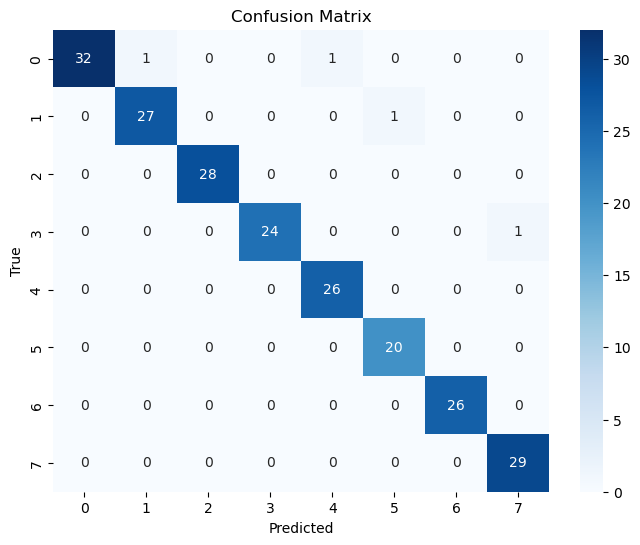


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        25
           4       0.96      1.00      0.98        26
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        26
           7       0.97      1.00      0.98        29

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216

Accuracy: 98.15%
Misclassification Rate: 1.85%


In [33]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns = X_train_imputed_scaled.columns)
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = model.predict(X_test_imputed_scaled)
y_prob = model.predict_proba(X_test_imputed_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

Clear sign of overfitting here.

Let's see if this model has the problem of multicollinearity

In [34]:
def calculate_VIF(X_train):
    vif = pd.DataFrame()
    vif["Features"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif.sort_values(by = "VIF", ascending = False, inplace = True)
    return vif

In [35]:
calculate_VIF(X_train_imputed_scaled)

Features    VIF
1           ITSN1_N  54.46
20           BRAF_N  48.31
3             NR1_N  43.62
0          DYRK1A_N  42.28
31       Bcatenin_N  40.53
14           pNR1_N  26.92
28           TRKA_N  26.59
24            ERK_N  25.84
16          pNR2B_N  25.76
37          AMPKA_N  24.85
25          GSK3B_N  21.85
40         RAPTOR_N  21.17
17         pPKCAB_N  20.41
4            NR2A_N  20.24
23            ELK_N  18.98
11           pJNK_N  18.12
15          pNR2A_N  17.33
10           pERK_N  16.94
12           PKCA_N  16.78
50     AcetylH3K9_N  16.36
41          TIAM1_N  16.20
39          pNUMB_N  15.96
75           CaNA_N  15.50
46          pPKCG_N  15.22
34            P38_N  14.89
56            Tau_N  14.52
33           MTOR_N  14.32
2            BDNF_N  14.27
19            AKT_N  13.94
29            RSK_N  13.61
13           pMEK_N  13.59
21         CAMKII_N  12.43
26            JNK_N  12.33
43           NUMB_N  12.03
35          pMTOR_N  11.79
8           pCREB_N  10.78
66  pGSK3B_Tyr216_N  10.34
36          DSCR1_N  10.19
44          P70S6_N   9.75
42         pP70S6_N   9.67
38           NR2B_N   9.47
60           IL1B_N   9.43
6           pBRAF_N   9.30
18           pRSK_N   9.09
7         pCAMKII_N   8.99
48             S6_N   8.98
64           SNCA_N   8.53
53            ARC_N   8.49
65      Ubiquitin_N   8.29
74         H3MeK4_N   8.23
27            MEK_N   8.19
5            pAKT_N   7.93
63          PSD95_N   7.71
62         pCASP9_N   7.64
32           SOD1_N   7.59
30            APP_N   7.20
22           CREB_N   7.15
49         ADARB1_N   6.30
45         pGSK3B_N   6.29
68            BAD_N   6.25
73           EGR1_N   5.94
61          P3525_N   5.89
54          ERBB4_N   5.64
55           nNOS_N   5.52
52            BAX_N   5.19
71            SYP_N   4.95
58          GluR3_N   4.87
69           BCL2_N   4.58
70          pCFOS_N   4.56
9            pELK_N   4.55
72        H3AcK18_N   4.46
57           GFAP_N   4.34
67            SHH_N   3.71
47           CDK5_N   2.74
51           RRP1_N   2.06
59          GluR4_N   2.03

Clearly, there is severe multicollinearity and overfitting here. We will use two methods to deal with this: One Selection (RFE) and one shrinkage method (Elastic Regularization)

1- Feature Selection

In [36]:
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='saga')

# Create RFE with 5-fold cross-validation
rfe = RFE(estimator=model, n_features_to_select=1, step=1)

# Fit RFE on your data
rfe.fit(X_train_imputed_scaled, y_train_encoded)

# Get the ranking of features (1 for selected, 2 for the next, etc.)
feature_ranking = rfe.ranking_

# Get a list of feature names
feature_names = X_train.columns  # Replace with the actual feature names from your dataset

# Create a dictionary to store features and their rankings
feature_rankings = dict(zip(feature_names, feature_ranking))

# Sort the features by their rankings (in ascending order)
sorted_features = sorted(feature_rankings.items(), key=lambda x: x[1])

In [37]:
sorted_features = pd.DataFrame(sorted_features, columns = ['Features', 'Ranking'])
sorted_features

Features  Ranking
0            SOD1_N        1
1             P38_N        2
2             APP_N        3
3         pCAMKII_N        4
4          pPKCAB_N        5
5           pNUMB_N        6
6            NR2A_N        7
7            CaNA_N        8
8            pJNK_N        9
9             Tau_N       10
10          ITSN1_N       11
11          pPKCG_N       12
12            ERK_N       13
13           BDNF_N       14
14         CAMKII_N       15
15          pNR2A_N       16
16           IL1B_N       17
17           nNOS_N       18
18         pCASP9_N       19
19          pNR2B_N       20
20          GSK3B_N       21
21      Ubiquitin_N       22
22            AKT_N       23
23          P3525_N       24
24           TRKA_N       25
25           pERK_N       26
26           NUMB_N       27
27          GluR3_N       28
28           NR2B_N       29
29          TIAM1_N       30
30           MTOR_N       31
31            ARC_N       32
32         pGSK3B_N       33
33          DSCR1_N       34
34             S6_N       35
35          AMPKA_N       36
36          P70S6_N       37
37          pCREB_N       38
38            SYP_N       39
39  pGSK3B_Tyr216_N       40
40       Bcatenin_N       41
41         pP70S6_N       42
42            BAX_N       43
43            JNK_N       44
44         RAPTOR_N       45
45         ADARB1_N       46
46          ERBB4_N       47
47          pMTOR_N       48
48           BRAF_N       49
49           PKCA_N       50
50           GFAP_N       51
51          pBRAF_N       52
52           CDK5_N       53
53         H3MeK4_N       54
54     AcetylH3K9_N       55
55           pRSK_N       56
56           SNCA_N       57
57            BAD_N       58
58            MEK_N       59
59           pNR1_N       60
60          PSD95_N       61
61           pAKT_N       62
62          GluR4_N       63
63         DYRK1A_N       64
64          pCFOS_N       65
65           CREB_N       66
66           pELK_N       67
67           EGR1_N       68
68        H3AcK18_N       69
69            RSK_N       70
70            NR1_N       71
71            ELK_N       72
72           RRP1_N       73
73           pMEK_N       74
74           BCL2_N       75
75            SHH_N       76

Train Data

In [38]:
# Select the top 'k' features based on your requirements 
k = 19
selected_features = list( sorted_features.loc[ sorted_features['Ranking'] < k, ['Features']]['Features'] )

# Create a new feature matrix with the selected features
X_train_selected = X_train_imputed_scaled.loc[:, selected_features]

# Fitting model on train data first
model.fit(X_train_selected, y_train_encoded)

# Make predictions on the training data
y_train_predictions = model.predict(X_train_selected)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Train Misclassification Rate: 2.55%


Test Set

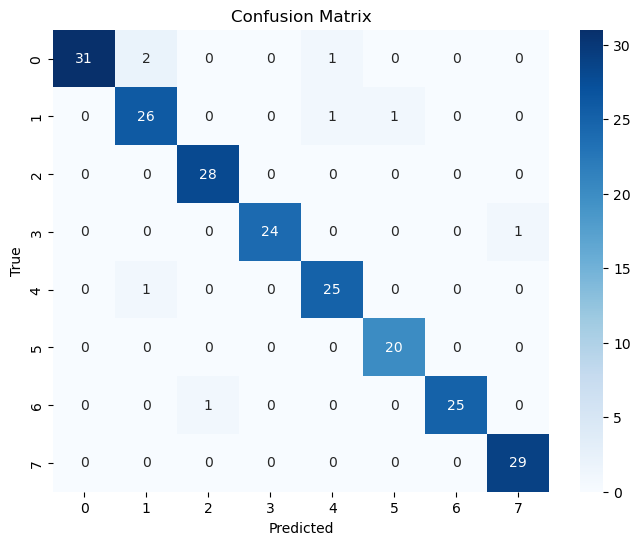


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.90      0.93      0.91        28
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        25
           4       0.93      0.96      0.94        26
           5       0.95      1.00      0.98        20
           6       1.00      0.96      0.98        26
           7       0.97      1.00      0.98        29

    accuracy                           0.96       216
   macro avg       0.96      0.97      0.96       216
weighted avg       0.96      0.96      0.96       216

Accuracy: 96.30%
Misclassification Rate: 3.70%


In [39]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns = X_train_imputed_scaled.columns)
X_test_selected = X_test_imputed_scaled.loc[:, selected_features]
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = model.predict(X_test_selected)
y_prob = model.predict_proba(X_test_selected)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

In [40]:
calculate_VIF(X_train_imputed_scaled[selected_features])

Features   VIF
12      ERK_N  8.57
4    pPKCAB_N  7.10
13     BDNF_N  6.99
6      NR2A_N  6.72
7      CaNA_N  5.66
11    pPKCG_N  4.81
1       P38_N  4.41
15    pNR2A_N  4.39
5     pNUMB_N  3.93
8      pJNK_N  3.62
3   pCAMKII_N  3.56
0      SOD1_N  3.35
14   CAMKII_N  3.13
16     IL1B_N  2.68
2       APP_N  2.38
10    ITSN1_N  2.30
17     nNOS_N  2.04
9       Tau_N  1.59

Clearly, feature selection helped in reducing VIF and has same performance as the Logisitic Regression

# Lasso Regression

In [41]:
# Define a range of hyperparameters for Lasso
param_grid = {
    'C': [0.5, 0.6],  # Inverse of regularization strength
}

# Create a Logistic Regression model with Lasso penalty
model = LogisticRegression(max_iter=10000, solver='saga', penalty='l1')

# Create a GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
)

# Fit the model with different hyperparameters using Grid Search
grid_search.fit(X_train_imputed_scaled, y_train_encoded)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model with the optimal parameters
best_model = grid_search.best_estimator_

# Fitting best model on train data
best_model.fit(X_train_imputed_scaled, y_train_encoded)

# Make predictions on the training data
y_train_predictions = best_model.predict(X_train_imputed_scaled)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Best Parameters: {'C': 0.6}
Train Misclassification Rate: 0.23%


In [42]:
# Get the coefficients (weights) of the features
coefficients = best_model.coef_

# Print or analyze the coefficients
print("Coefficients:", coefficients)

Coefficients: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.41049361e-01  0.00000000e+00  0.00000000e+00 -8.52826714e-01
  -1.35773700e+00  0.00000000e+00  0.00000000e+00  8.91026380e-01
   4.73801538e-01  0.00000000e+00  0.00000000e+00 -3.05835653e-01
  -8.31862494e-01  0.00000000e+00  1.05751776e-01  1.10684716e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   9.97550035e-01  0.00000000e+00  5.38759536e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -5.67593351e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.96333214e-02  0.00000000e+00  0.00000000e+00  4.42510009e-01
   0.00000000e+00 -2.12165165e-01  0.00000000e+00  0.00000000e+00
  -4.35356412e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -1.08197669e+00  0.00000000e+00  0.00000000e+00  4.53360015e-01
   0.00000000e+00  0.00000000e+00  5.39886058e-01  0.00000000e

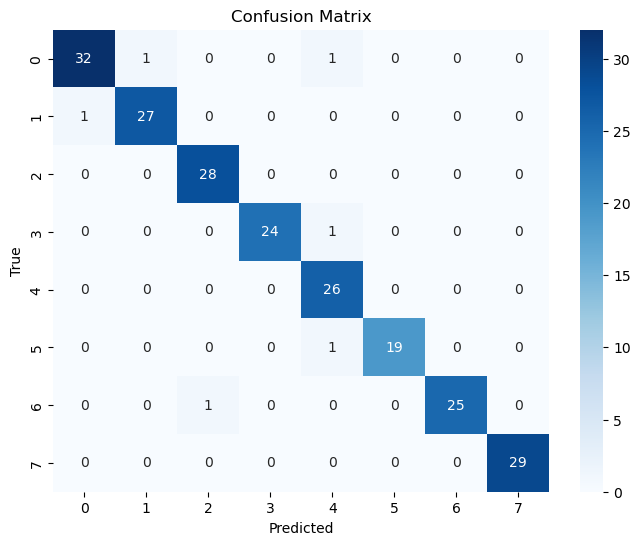


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        34
           1       0.96      0.96      0.96        28
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        25
           4       0.90      1.00      0.95        26
           5       1.00      0.95      0.97        20
           6       1.00      0.96      0.98        26
           7       1.00      1.00      1.00        29

    accuracy                           0.97       216
   macro avg       0.97      0.97      0.97       216
weighted avg       0.97      0.97      0.97       216

Accuracy: 97.22%
Misclassification Rate: 2.78%


In [43]:
# Fitting model on train data first
best_model.fit(X_train_imputed_scaled, y_train_encoded)

# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns = X_train_imputed_scaled.columns)
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = best_model.predict(X_test_imputed_scaled)
y_prob = best_model.predict_proba(X_test_imputed_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

# 2- <font color="red">Elastic Net Logistic Regression</font>

In [44]:
# Define a range of hyperparameters for ElasticNet
param_grid = {
    'C': [0.4],  # Inverse of regularization strength
    'l1_ratio': np.arange(0.1, 0.9, 0.1)  # L1 ratio (0.0 is L2 penalty, 1.0 is L1 penalty)
}

# Create a Logistic Regression model
model = LogisticRegression(max_iter=10000, solver='saga', penalty='elasticnet')

# Create a GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
)

# Fit the model with different hyperparameters using Grid Search
grid_search.fit(X_train_imputed_scaled, y_train_encoded)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model with the optimal parameters
best_model = grid_search.best_estimator_

# Fitting best model on train data
best_model.fit(X_train_imputed_scaled, y_train_encoded)

# Make predictions on the training data
y_train_predictions = best_model.predict(X_train_imputed_scaled)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Best Parameters: {'C': 0.4, 'l1_ratio': 0.1}
Train Misclassification Rate: 0.12%


Test Set

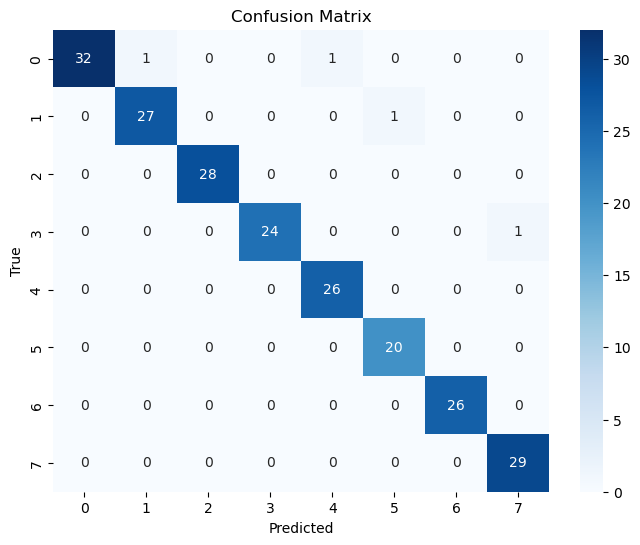


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       0.96      0.96      0.96        28
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        25
           4       0.96      1.00      0.98        26
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        26
           7       0.97      1.00      0.98        29

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216

Accuracy: 98.15%
Misclassification Rate: 1.85%


In [45]:
# Make predictions on the test set
y_pred = best_model.predict(X_test_imputed_scaled)
y_prob = best_model.predict_proba(X_test_imputed_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

# 3- <font color="red">Support Vector Machines</font>

Feature Selection

In [54]:
# Create an SVM model
model = SVC(kernel='linear')  # You can choose the appropriate kernel for your problem

# Create RFE with 5-fold cross-validation
rfe = RFE(estimator=model, n_features_to_select=1, step=1)

# Fit RFE on your data
rfe.fit(X_train_imputed_scaled, y_train_encoded)

# Get the ranking of features (1 for selected, 2 for the next, etc.)
feature_ranking = rfe.ranking_

# Get a list of feature names
feature_names = X_train.columns  # Replace with the actual feature names from your dataset

# Create a dictionary to store features and their rankings
feature_rankings = dict(zip(feature_names, feature_ranking))

# Sort the features by their rankings (in ascending order)
sorted_features = sorted(feature_rankings.items(), key=lambda x: x[1])

In [55]:
sorted_features = pd.DataFrame(sorted_features, columns = ['Features', 'Ranking'])
sorted_features

Features  Ranking
0           pNUMB_N        1
1            MTOR_N        2
2          pPKCAB_N        3
3         pCAMKII_N        4
4             APP_N        5
5           ITSN1_N        6
6             AKT_N        7
7              S6_N        8
8             Tau_N        9
9            CaNA_N       10
10           pJNK_N       11
11          pNR2A_N       12
12            ERK_N       13
13           nNOS_N       14
14           TRKA_N       15
15           IL1B_N       16
16         pCASP9_N       17
17         CAMKII_N       18
18          pPKCG_N       19
19           SOD1_N       20
20           BDNF_N       21
21           NUMB_N       22
22          GluR3_N       23
23  pGSK3B_Tyr216_N       24
24         pGSK3B_N       25
25      Ubiquitin_N       26
26         pP70S6_N       27
27         RAPTOR_N       28
28          pNR2B_N       29
29           pERK_N       30
30           pRSK_N       31
31          DSCR1_N       32
32           NR2A_N       33
33            BAX_N       34
34          P3525_N       35
35          PSD95_N       36
36           NR2B_N       37
37          pCREB_N       38
38            SYP_N       39
39           GFAP_N       40
40          pMTOR_N       41
41            ARC_N       42
42         ADARB1_N       43
43            RSK_N       44
44          AMPKA_N       45
45         DYRK1A_N       46
46          P70S6_N       47
47           SNCA_N       48
48            SHH_N       49
49            JNK_N       50
50         H3MeK4_N       51
51            P38_N       52
52          TIAM1_N       53
53          GSK3B_N       54
54          pBRAF_N       55
55           RRP1_N       56
56            NR1_N       57
57           BRAF_N       58
58           CDK5_N       59
59          GluR4_N       60
60        H3AcK18_N       61
61           pNR1_N       62
62          pCFOS_N       63
63            BAD_N       64
64           PKCA_N       65
65          ERBB4_N       66
66           pAKT_N       67
67     AcetylH3K9_N       68
68           pELK_N       69
69       Bcatenin_N       70
70           BCL2_N       71
71           pMEK_N       72
72           EGR1_N       73
73           CREB_N       74
74            ELK_N       75
75            MEK_N       76

Train Data

In [63]:
# Select the top 'k' features based on your requirements 
k = 23
selected_features = list( sorted_features.loc[ sorted_features['Ranking'] < k, ['Features']]['Features'] )

# Create a new feature matrix with the selected features
X_train_selected = X_train_imputed_scaled.loc[:, selected_features]

# Fitting best model on train data
model.fit(X_train_selected, y_train_encoded)

# Make predictions on the training data
y_train_predictions = model.predict(X_train_selected)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Train Misclassification Rate: 0.12%


Test Data

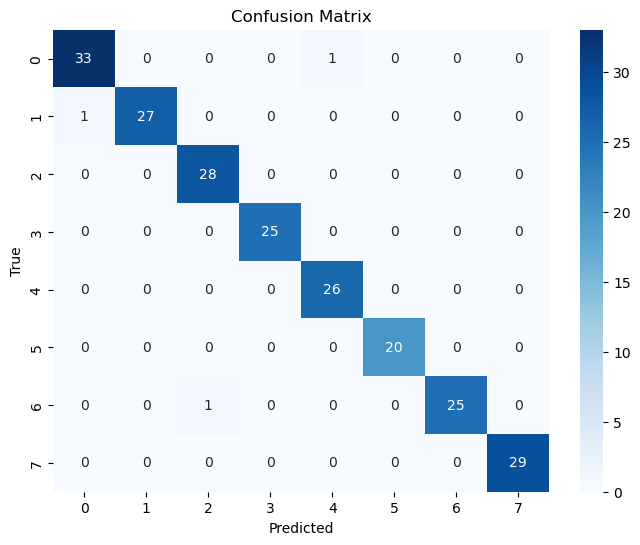


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       1.00      0.96      0.98        28
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        25
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        20
           6       1.00      0.96      0.98        26
           7       1.00      1.00      1.00        29

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Accuracy: 98.61%
Misclassification Rate: 1.39%


In [64]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns=X_train_imputed_scaled.columns)
X_test_selected = X_test_imputed_scaled.loc[:, selected_features]
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = model.predict(X_test_selected)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

HyperParameter Tuning

In [65]:
# Define a range of hyperparameters for SVM
param_grid = {
    'C': [0.6],  # Regularization parameter
    'kernel': ['poly', 'rbf', 'sigmoid'],  # Kernel function
    'degree': [0, 1, 2, 3, 4],  # Degree for 'poly' kernel
#     'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1, 10]  # Kernel coefficient for 'rbf' and 'poly' kernels
}

# Create an SVM model
model = SVC(probability=False)  # Use probability=False for standard prediction

# Create GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Fit the model with different hyperparameters
grid_search.fit(X_train_selected, y_train_encoded)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model with the optimal parameters
best_model = grid_search.best_estimator_

# Fitting best model on train data
best_model.fit(X_train_selected, y_train_encoded)

# Make predictions on the training data
y_train_predictions = best_model.predict(X_train_selected)

# Calculate the training error (misclassification rate)
training_error = 1 - accuracy_score(y_train_encoded, y_train_predictions)

print(f"Train Misclassification Rate: {training_error:.2%}")

Best Parameters: {'C': 0.6, 'degree': 0, 'kernel': 'rbf'}
Train Misclassification Rate: 0.12%


Test Data

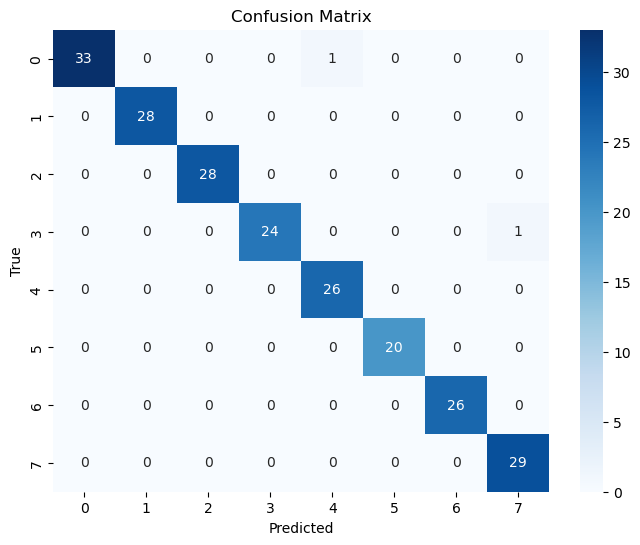


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        25
           4       0.96      1.00      0.98        26
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        26
           7       0.97      1.00      0.98        29

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Accuracy: 99.07%
Misclassification Rate: 0.93%


In [66]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns=X_train_imputed_scaled.columns)
X_test_selected = X_test_imputed_scaled.loc[:, selected_features]
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = best_model.predict(X_test_selected)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

# 4- <font color="red">Tree Based Algos</font>

## 4-(i) Decision Tree

* Simple DT (w/o any regularization)

Train Data

Training Misclassification Rate: 0.00%


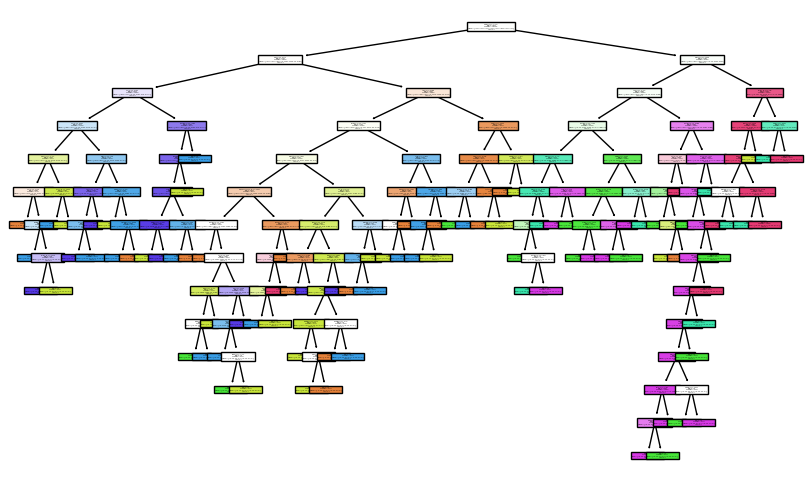

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       107
           2       1.00      1.00      1.00       122
           3       1.00      1.00      1.00       110
           4       1.00      1.00      1.00       109
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00       109
           7       1.00      1.00      1.00       106

    accuracy                           1.00       864
   macro avg       1.00      1.00      1.00       864
weighted avg       1.00      1.00      1.00       864



In [67]:
# Step 1: Fit a Decision Tree to the training data
model = DecisionTreeClassifier()
model.fit(X_train_imputed_scaled, y_train_encoded)

# Step 2: Make predictions on the training set
y_train_pred = model.predict(X_train_imputed_scaled)

# Step 3: Calculate the misclassification rate on the training set
misclassification_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)
print(f"Training Misclassification Rate: {misclassification_rate:.2%}")

plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in model.classes_], proportion=True)
plt.show()

# # Additional: Display the confusion matrix and classification report
# conf_matrix = confusion_matrix(y_train_encoded, y_train_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

class_report = classification_report(y_train_encoded, y_train_pred)
print("Classification Report:")
print(class_report)

Test Data

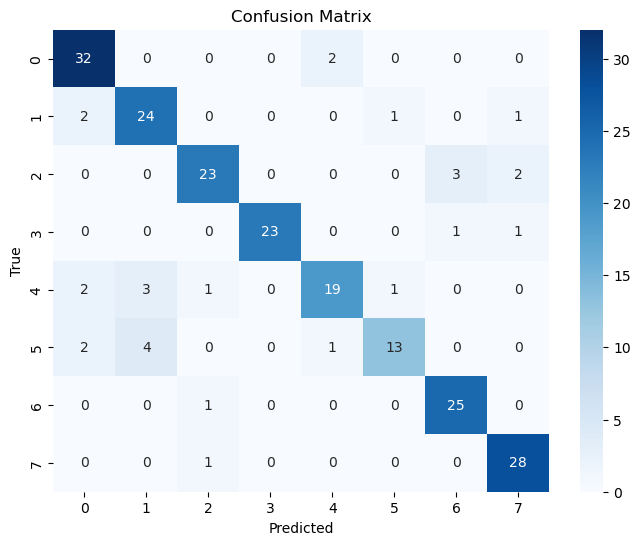


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        34
           1       0.77      0.86      0.81        28
           2       0.88      0.82      0.85        28
           3       1.00      0.92      0.96        25
           4       0.86      0.73      0.79        26
           5       0.87      0.65      0.74        20
           6       0.86      0.96      0.91        26
           7       0.88      0.97      0.92        29

    accuracy                           0.87       216
   macro avg       0.87      0.86      0.86       216
weighted avg       0.87      0.87      0.86       216

Accuracy: 86.57%
Misclassification Rate: 13.43%


In [68]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns = X_train_imputed_scaled.columns)
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = model.predict(X_test_imputed_scaled)
y_prob = model.predict_proba(X_test_imputed_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

Clearly, a single tree is overfitting here. We'll use pruning to overcome this.

* Cost Complexity Pruned Tree

In [88]:
# Define a range of ccp_alpha values for pruning
ccp_alphas = np.linspace(0.001, 0.11, 1000)  # Adjust the range and number of values as needed

train_misclassification_rates = []
test_misclassification_rates = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_imputed_scaled, y_train_encoded)
    
    y_train_pred = clf.predict(X_train_imputed_scaled)
    train_misclassification_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)
    train_misclassification_rates.append(train_misclassification_rate)

    y_test_pred = clf.predict(X_test_imputed_scaled)
    test_misclassification_rate = 1 - accuracy_score(y_test_encoded, y_test_pred)
    test_misclassification_rates.append(test_misclassification_rate)

# Calculate 1/ccp_alpha
inverse_ccp_alphas = [1/ccp_alpha if ccp_alpha != 0 else np.inf for ccp_alpha in ccp_alphas]

In [89]:
# Convert data to a DataFrame
data = pd.DataFrame({
    '1/ccp_alpha': inverse_ccp_alphas,
    'Train Misclassification Rate': train_misclassification_rates,
    'Test Misclassification Rate': test_misclassification_rates
})

# Create an interactive line plot
fig = px.line(data, x='1/ccp_alpha', y=['Train Misclassification Rate', 'Test Misclassification Rate'],
              labels={'value': 'Misclassification Rate'},
              title='1/ccp_alpha vs. Misclassification Rate',
              template='plotly')

# Customize the hover label format
fig.update_traces(hovertemplate='1/ccp_alpha: %{x:.4f}<br>Rate: %{y:.4%}')

# Show the interactive plot
fig.show()

1/alpha around 120.225 seems to be a good choice, i.e., alpha = 0.0083177375753795

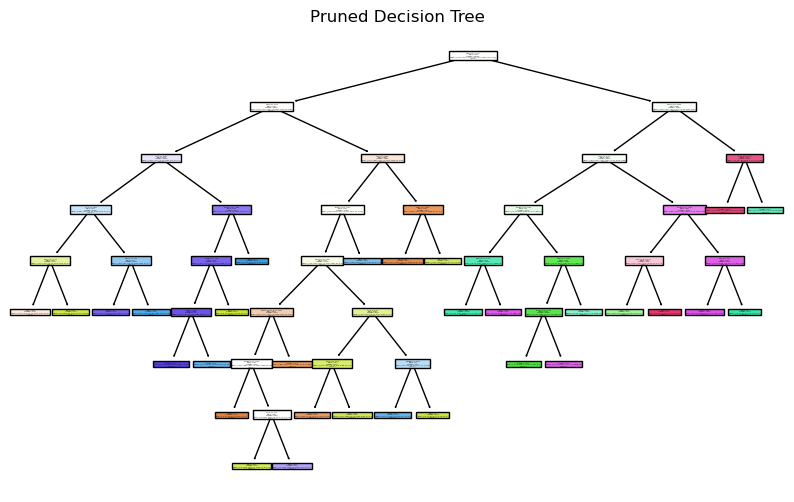

Train Misclassification Rate with best ccp_alpha (0.0083): 11.00%
Test Misclassification Rate with best ccp_alpha (0.0083): 18.06%


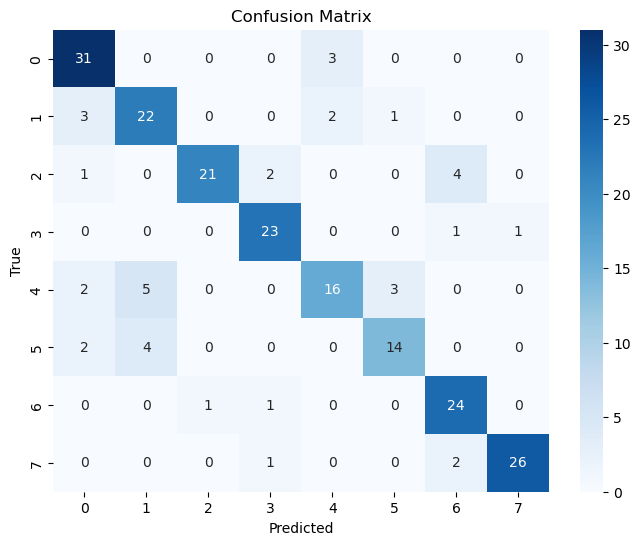

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        34
           1       0.71      0.79      0.75        28
           2       0.95      0.75      0.84        28
           3       0.85      0.92      0.88        25
           4       0.76      0.62      0.68        26
           5       0.78      0.70      0.74        20
           6       0.77      0.92      0.84        26
           7       0.96      0.90      0.93        29

    accuracy                           0.82       216
   macro avg       0.82      0.81      0.81       216
weighted avg       0.83      0.82      0.82       216



In [91]:
# Create a Decision Tree model with a specific ccp_alpha
alpha =  0.0083177375753795
model = DecisionTreeClassifier(ccp_alpha=alpha)
model.fit(X_train_imputed_scaled, y_train_encoded)

# Calculate train misclassification rate
y_train_pred = model.predict(X_train_imputed_scaled)
train_misclassification_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)

# Plot the pruned Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=[str(c) for c in model.classes_], proportion=True)
plt.title('Pruned Decision Tree')
plt.show()

# Calculate confusion matrix and classification report for the best pruned tree on the test set
y_test_pred = model.predict(X_test_imputed_scaled)
test_misclassification_rate = 1 - accuracy_score(y_test_encoded, y_test_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)

# Print train and test misclassification rates
print(f"Train Misclassification Rate with best ccp_alpha ({alpha:.4f}): {train_misclassification_rate:.2%}")
print(f"Test Misclassification Rate with best ccp_alpha ({alpha:.4f}): {test_misclassification_rate:.2%}")

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test_encoded, y_test_pred)
print("Classification Report:")
print(class_report)

This is the best we can do with a single tree. We will now use tree ensemble to get a better generalization than a single tree.

## 4-(ii) Random Forest

In [108]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=0)  # You can adjust the number of estimators (trees) as needed

# Fit the model to the training data
rf_model.fit(X_train_imputed_scaled, y_train_encoded)

# Make predictions on the training set
y_train_pred = rf_model.predict(X_train_imputed_scaled)

# Calculate the misclassification rate on the training set
train_misclassification_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)

print(f"Train Misclassification Rate: {train_misclassification_rate:.2%}")

Train Misclassification Rate: 0.00%


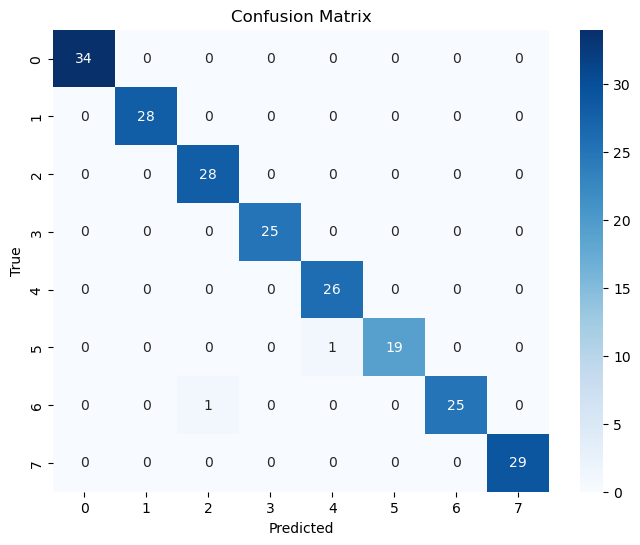


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        28
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00        25
           4       0.96      1.00      0.98        26
           5       1.00      0.95      0.97        20
           6       1.00      0.96      0.98        26
           7       1.00      1.00      1.00        29

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216

Accuracy: 99.07%
Misclassification Rate: 0.93%


In [109]:
# Make predictions on the test set
X_test_imputed = knn_imputer.transform(X_test)
X_test_imputed_scaled = feature_scaler.transform(X_test_imputed)
X_test_imputed_scaled = pd.DataFrame(X_test_imputed_scaled, columns = X_train_imputed_scaled.columns)
y_test_encoded = y_lab_encoder.transform(y_test)

y_pred = rf_model.predict(X_test_imputed_scaled)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate and display classification report (precision, recall, f1-score)
class_report = classification_report(y_test_encoded, y_pred)
print("\nClassification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2%}")

# Calculate the misclassification rate (1 - Accuracy) for the test data
misclassification_rate = 1 - accuracy
print(f"Misclassification Rate: {misclassification_rate:.2%}")

RF is exactly fitting the train set. We will tune it's hyperparameter to get better results.

* Hyperparameter Tuning

Train Data

In [113]:
# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=0, bootstrap = True, n_jobs = -1, max_features = 'auto')

# Define a range of hyperparameters for tuning
param_grid = {
    'n_estimators': [20000, 1],           # Number of trees in the forest
#     'max_depth': [4, 5],           # Maximum depth of the trees
    'min_impurity_decrease' : [0.006, 0.1] 
}


# Create a GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Fit the model with different hyperparameters
grid_search.fit(X_train_imputed_scaled, y_train_encoded)

# Get the best hyperparameter values
best_params = grid_search.best_params_
print("Best Hyperparameter Values:")
print(best_params)

# Obtain best estimator
best_rf_estimator = grid_search.best_estimator_

# Calculate train misclassification rate
y_train_pred = best_rf_estimator.predict(X_train_imputed_scaled)
train_misclassification_rate = 1 - accuracy_score(y_train_encoded, y_train_pred)

# Print train and test misclassification rates
print(f"Train Misclassification Rate: {train_misclassification_rate:.2%}")

Best Hyperparameter Values:
{'min_impurity_decrease': 0.006, 'n_estimators': 20000}
Train Misclassification Rate: 0.12%


Test Data

Test Misclassification Rate: 1.85%


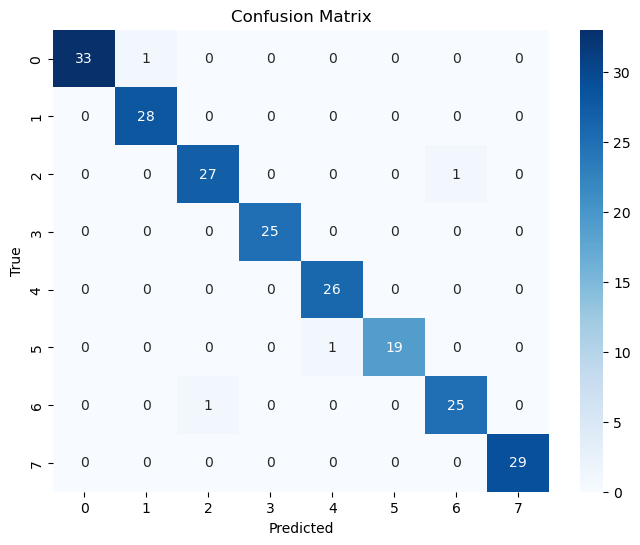

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.97      1.00      0.98        28
           2       0.96      0.96      0.96        28
           3       1.00      1.00      1.00        25
           4       0.96      1.00      0.98        26
           5       1.00      0.95      0.97        20
           6       0.96      0.96      0.96        26
           7       1.00      1.00      1.00        29

    accuracy                           0.98       216
   macro avg       0.98      0.98      0.98       216
weighted avg       0.98      0.98      0.98       216



In [114]:
# Calculate confusion matrix and classification report for the best estimator on the test set
y_test_pred = best_rf_estimator.predict(X_test_imputed_scaled)
test_misclassification_rate = 1 - accuracy_score(y_test_encoded, y_test_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_test_pred)
print(f"Test Misclassification Rate: {test_misclassification_rate:.2%}")

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_test_encoded, y_test_pred)
print("Classification Report:")
print(class_report)

# 5- <font color="red">DL Model - ANN</font>

In [271]:
input_dim = X_train_imputed_scaled.shape[1]

# Define the model
model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(8, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',  # You can choose other optimizers like SGD or RMSprop
              loss='sparse_categorical_crossentropy',  # For classification problems
              metrics=['accuracy'])

# Train the model
model.fit(X_train_imputed_scaled, y_train_encoded, epochs=4, batch_size=50)  # Adjust epochs and batch size as needed

Epoch 1/4
18/18 [==============================] - 0s 4ms/step - loss: 1.2487 - accuracy: 0.6285
Epoch 2/4
18/18 [==============================] - 0s 3ms/step - loss: 0.4185 - accuracy: 0.9282
Epoch 3/4
18/18 [==============================] - 0s 3ms/step - loss: 0.2094 - accuracy: 0.9826
Epoch 4/4
18/18 [==============================] - 0s 2ms/step - loss: 0.1204 - accuracy: 0.9919


In [272]:
train_predicted = model.predict(X_train_imputed_scaled)

predicted_labels = np.argmax(train_predicted, axis=1)

# Calculate accuracy using sklearn's accuracy_score
train_accuracy = accuracy_score(y_train_encoded, predicted_labels)

# Calculate the misclassification rate
train_misclassification_rate = 1 - train_accuracy

print(f'Training Misclassification Rate: {train_misclassification_rate:.2%}')

27/27 [==============================] - 0s 1ms/step
Training Misclassification Rate: 0.12%


7/7 [==============================] - 0s 2ms/step
Misclassification Rate: 1.39%



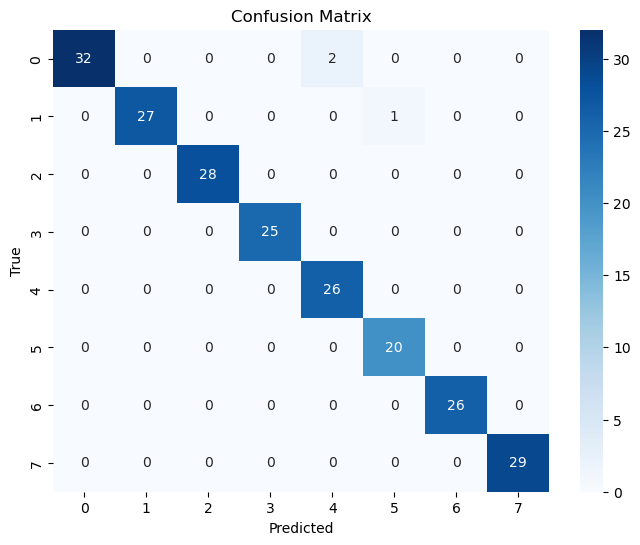

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        28
           3       1.00      1.00      1.00        25
           4       0.93      1.00      0.96        26
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        29

    accuracy                           0.99       216
   macro avg       0.99      0.99      0.99       216
weighted avg       0.99      0.99      0.99       216



In [273]:
# Make predictions
y_pred = model.predict(X_test_imputed_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class labels

# Calculate misclassification rate
test_accuracy = accuracy_score(y_test_encoded, y_pred_classes)
misclassification_rate = 1 - test_accuracy
print(f'Misclassification Rate: {misclassification_rate:.2%}\n')

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_classes)

# Plot a labeled heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
class_names = [str(i) for i in range(8)]  # Assuming your class labels are integers
report = classification_report(y_test_encoded, y_pred_classes, target_names=class_names)
print("Classification Report:")
print(report)

This is the best model so far.

**Model Performances**

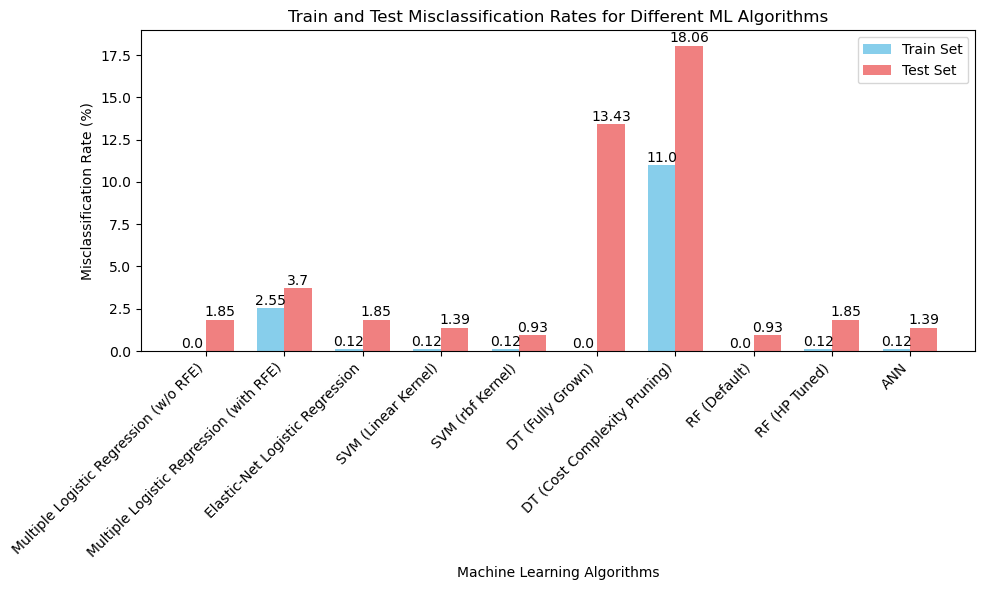

     ------------------------------------ 148.6/148.6 kB 804.4 kB/s eta 0:00:00
     -------------------------------------- 129.5/129.5 kB 1.5 MB/s eta 0:00:00
     -------------------------------------- 590.1/590.1 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 101.3/101.3 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 5.0/5.0 MB 2.2 MB/s eta 0:00:00
     -------------------------------------- 239.8/239.8 kB 2.1 MB/s eta 0:00:00
     -------------------------------------- 950.8/950.8 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 87.5/87.5 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 85.4/85.4 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 455.9/455.9 MB 1.9 MB/s eta 0:00:00
     -------------------------------------- 455.9/455.9 MB 1.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [20 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\piyus\AppData\Local\Temp\pip-install-se7ch8oy\requests_9ea9a74587b94c008d1b353bb95d86f3\setup.py", line 6, in <module>
      import requests
    File "C:\Users\piyus\AppData\Local\Temp\pip-install-se7ch8oy\requests_9ea9a74587b94c008d1b353bb95d86f3\requests\__init__.py", line 58, in <module>
      from . import utils
    File "C:\Users\piyus\AppData\Local\Temp\pip-install-se7ch8oy\requests_9ea9a74587b94c008d1b353bb95d86f3\requests\utils.py", line 23, in <module>
      from .compat import parse_http_list as _parse_list_header
    File "C:\Users\piyus\AppData\Local\Temp\pip-install-se7ch8oy\requests_9ea9a74587b94c008d1b353bb95d86f3\requests\compat.py", line 7, in <module>
      from .packages import chara

In [276]:
# Define the algorithm names
algorithms = [
    "Multiple Logistic Regression (w/o RFE)",
    "Multiple Logistic Regression (with RFE)",
    "Elastic-Net Logistic Regression",
    "SVM (Linear Kernel)",
    "SVM (rbf Kernel)",
    "DT (Fully Grown)",
    "DT (Cost Complexity Pruning)",
    "RF (Default)",
    "RF (HP Tuned)",
    "ANN"
]

# Define the train and test misclassification rates for each algorithm
train_misclassification_rates = [
    0.00, 2.55, 0.12, 0.12, 0.12, 0.00, 11.00, 0.00, 0.12, 0.12
]

test_misclassification_rates = [
    1.85, 3.70, 1.85, 1.39, 0.93, 13.43, 18.06, 0.93, 1.85, 1.39
]

# Define the width of the bars
bar_width = 0.35

# Create an array of indices for the algorithms
x = np.arange(len(algorithms))

# Create a grouped bar plot
fig, ax = plt.subplots(figsize=(10, 6))
train_bars = ax.bar(x - bar_width/2, train_misclassification_rates, bar_width, label='Train Set', color='skyblue')
test_bars = ax.bar(x + bar_width/2, test_misclassification_rates, bar_width, label='Test Set', color='lightcoral')

# Add labels and titles to the plot
ax.set_xlabel('Machine Learning Algorithms')
ax.set_ylabel('Misclassification Rate (%)')
ax.set_title('Train and Test Misclassification Rates for Different ML Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(algorithms, rotation=45, ha='right')
ax.legend()

# Add labels on top of the bars
for i, v in enumerate(train_misclassification_rates):
    ax.text(i - bar_width/2, v + 0.2, str(v), color='black', ha='center')
for i, v in enumerate(test_misclassification_rates):
    ax.text(i + bar_width/2, v + 0.2, str(v), color='black', ha='center')

# Show the grouped bar plot
plt.tight_layout()
plt.show()